<a href="https://colab.research.google.com/github/mdmufeed/Customer-Churn-Analysis/blob/main/customer_churn_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
# concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#splitting into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
 #feature scaling
 from sklearn.preprocessing import StandardScaler
 sc= StandardScaler()
 X_train= sc.fit_transform(X_train)
 X_test= sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
##create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
 #initialize ANN
 classifier= Sequential()

In [ ]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history= classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5090 - accuracy: 0.7611 - val_loss: 0.4495 - val_accuracy: 0.8023
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4299 - accuracy: 0.8100 - val_loss: 0.4273 - val_accuracy: 0.8103
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4082 - accuracy: 0.8237 - val_loss: 0.4120 - val_accuracy: 0.8183
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3904 - accuracy: 0.8352 - val_loss: 0.4000 - val_accuracy: 0.8243
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8457 - val_loss: 0.3879 - val_accuracy: 0.8342
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3620 - accuracy: 0.8537 - val_loss: 0.3757 - val_accuracy: 0.8406
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3521 - accuracy: 0.8563 - val_loss: 0.3687 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

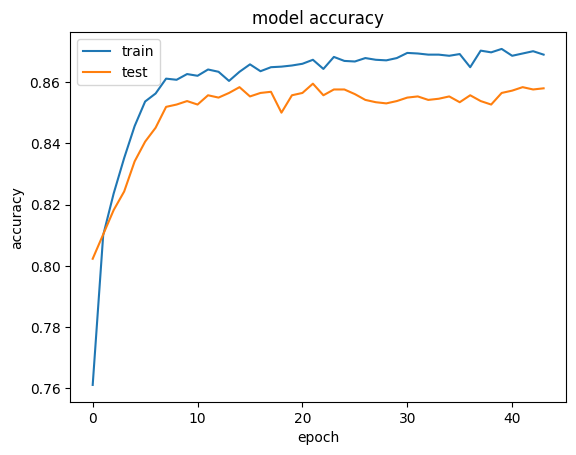

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

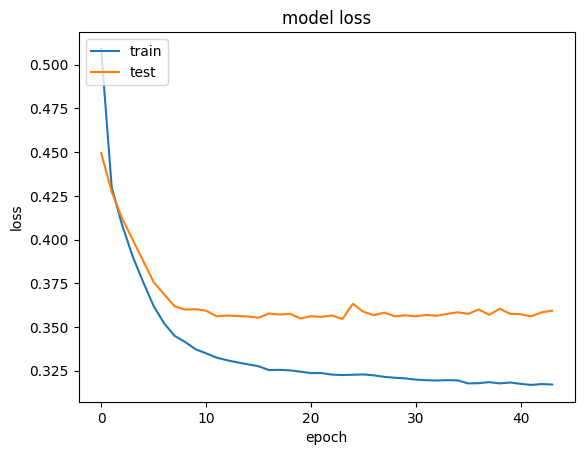

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Making the predictions and evaluating the model

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)


63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1504,   91],
       [ 203,  202]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)

In [ ]:
score

0.853